In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,10000000)

In [3]:
noise  = np.random.randn(len(x_data))

In [4]:
x_data

array([0.0000000e+00, 1.0000001e-06, 2.0000002e-06, ..., 9.9999980e+00,
       9.9999990e+00, 1.0000000e+01])

In [5]:
#y = mx+b

In [6]:
y_true  = (0.5* x_data) + 5 + noise  

In [7]:
x_df = pd.DataFrame(data = x_data,columns = ['xdata'])

In [8]:
y_df = pd.DataFrame(data=y_true,columns = ['Y'])

In [9]:
my_data = pd.concat([x_df,y_df], axis =1)

In [10]:
my_data.head()

,xdata,Y
0,0.000000,4.475042
1,0.000001,4.828490
2,0.000002,5.461446
3,0.000003,5.410231
4,0.000004,4.657047


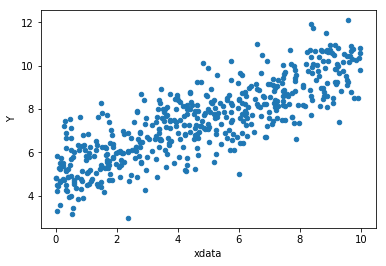

In [11]:
my_data.sample(500).plot(kind = 'scatter',x='xdata',y='Y')

In [14]:
batch_size = 8

In [15]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [16]:
x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])

In [17]:
y_model = m*x_ph + b

In [18]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    batches = 3000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data) , size = batch_size)
        feed = {x_ph:x_data[rand_ind],y_ph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m,model_b = sess.run([m,b])

In [25]:
model_m

0.51667506

In [26]:
model_b

4.971713

In [27]:
y_hat = x_data*model_m + model_b

In [28]:
y_hat

array([ 4.97171307,  4.97171358,  4.9717141 , ..., 10.13846258,
       10.1384631 , 10.13846362])

In [29]:
y_true

array([ 4.47504239,  4.82849022,  5.4614461 , ..., 11.12746874,
        9.38565977,  9.25260121])

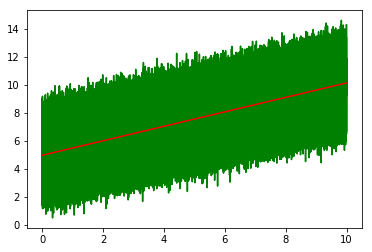

In [31]:
plt.plot(x_data,y_true,'g')
plt.plot(x_data,y_hat,'r')